# Assignment 2 || Samuel Steiner 
## Iris Dataset [60 Points]
Using your own module of choice (we recommend pandas), download the Iris flower dataset
available at (http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.
data) into a Data-Frame. For more details about the dataset and to obtain the feature names,
check (http://archive.ics.uci.edu/ml/datasets/Iris). It is always recommended that
you familiarize yourself with the data you intend to use for data mining purposes. The Iris
dataset, in particular, has a rich history, having been introduced in 1936 by Sir Ronald Fisher,
often considered one of the fathers of modern statistical theory.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

In [2]:
iris.loc[iris['Class'] != 'Iris-setosa'].head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


## Summary Statistics [10 Points]
Compute and display summary statistics for each feature available in the dataset. These
must include the minimum value, maximum value, mean, range, standard deviation, variance,
count, and 25:50:75% percentiles

In [3]:
iris_summary = iris.describe().T
iris_summary['range'] = [(np.ptp(iris[index])) for index in iris_summary.T]
iris_summary['variance'] = [iris[index].var() for index in iris_summary.T]
iris_summary


,count,mean,std,min,25%,50%,75%,max,range,variance
Sepal_Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6,0.685694
Sepal_Width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4,2.4,0.188004
Petal_Length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9,5.9,3.113179
Petal_Width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5,2.4,0.582414


## Data Visualization [25 Points]
**Histograms:** To illustrate the feature distributions, create a histogram for each feature in
the dataset. You may plot each histogram individually or combine them all into a single plot.
When generating histograms for this assignment, use the default number of bins. Recall that
a histogram provides a graphical representation of the distribution of the data

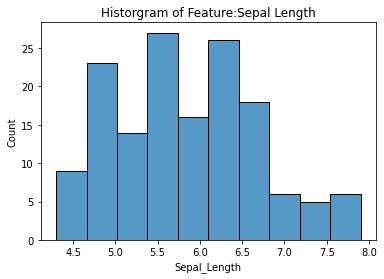

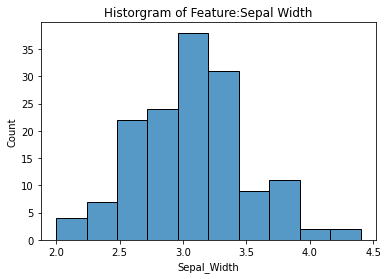

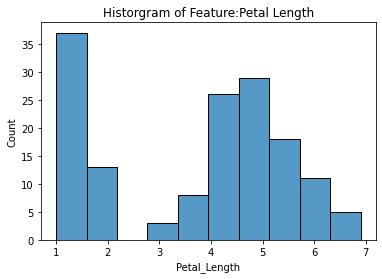

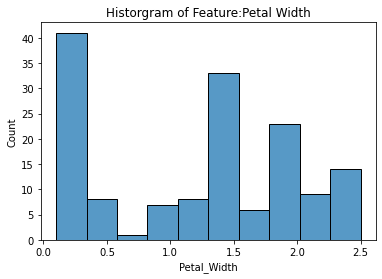

In [4]:
feats = col_names[:-1]
for i, feat in enumerate(feats):
    plt.figure(i)
    sns.histplot(x=iris[feat], bins=10) # bins need to be set to 10 to match the settings in the pandas package
    plt.title(f'Historgram of Feature:{feat.replace("_"," ")}')

**Box Plots:** To further understand the data, create a boxplot for each feature in the dataset.
Present all the boxplots into a single plot. Recall that a boxplot provides a graphical representation of the location and variation of the data through their quartiles; they are especially useful for comparing distributions and identifying outliers.

Text(0.5, 1.0, 'Box Plot for each feature')

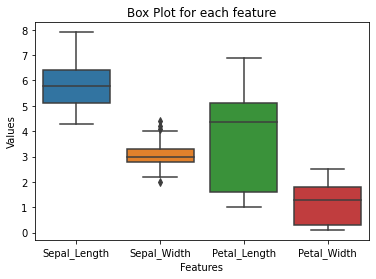

In [5]:
s = sns.boxplot(data=iris)
s.set_xlabel('Features')
s.set_ylabel('Values')
s.set_title('Box Plot for each feature')

**Pairwise Plot:** To understand the relationship between the features, create a scatter plot for
each pair of the features. If there are are n features in the dataset, there should be nC2plots.

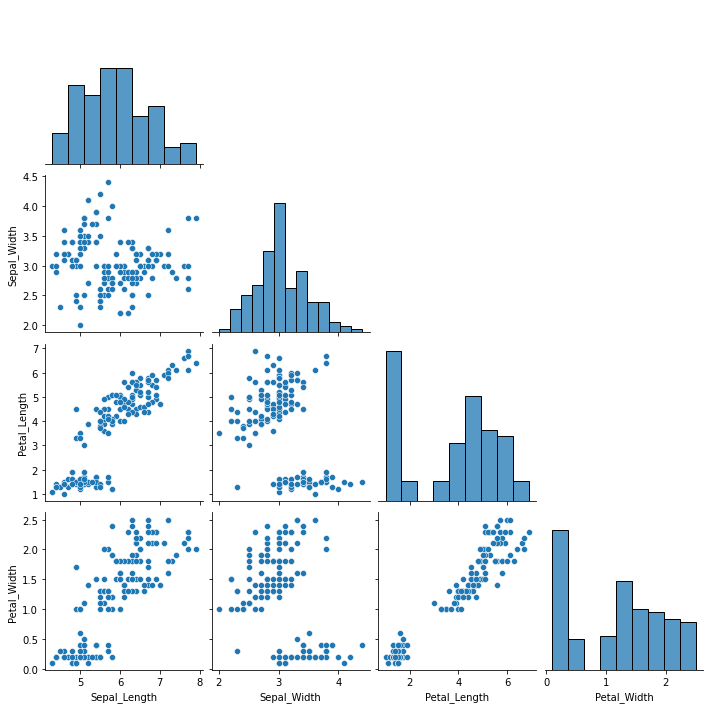

In [6]:
sns.pairplot(data=iris, corner=True)

**Class-wise Visualization:** Create histograms for each feature in a similar way for each of
the different classes present in the data

The classes based on the documentation are as follows: Iris Setosa, Iris Versicolour, Iris Virginica

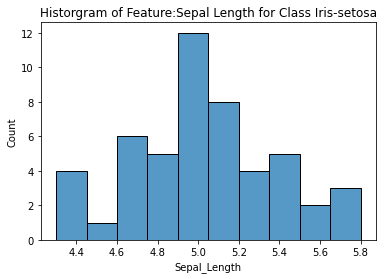

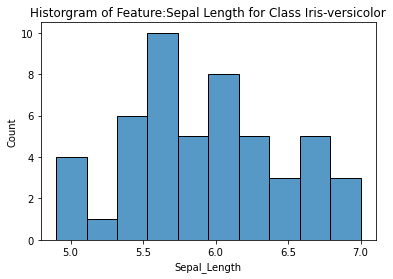

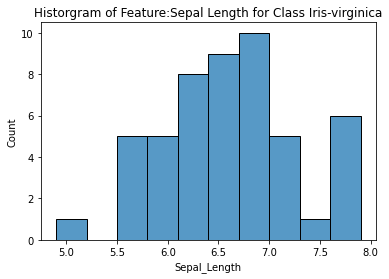

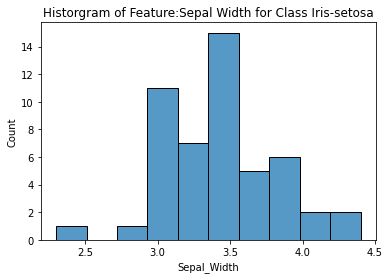

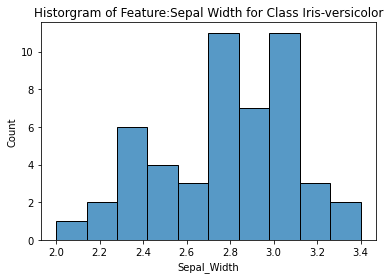

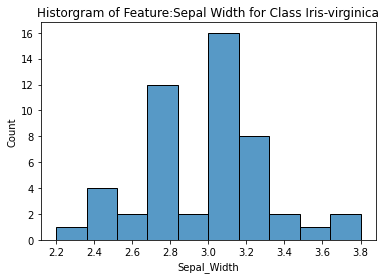

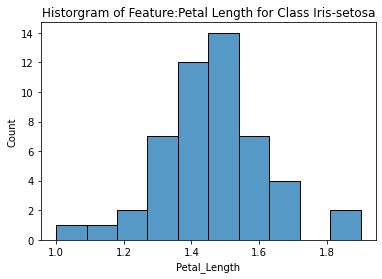

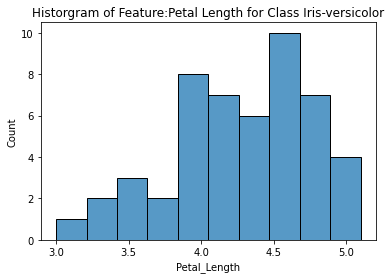

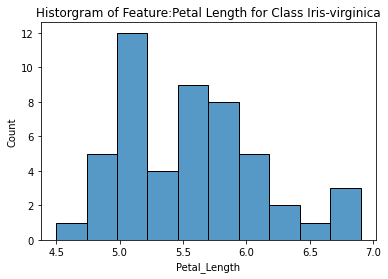

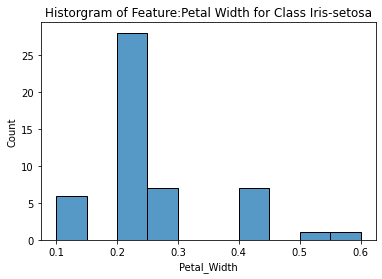

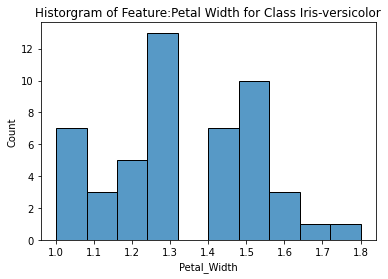

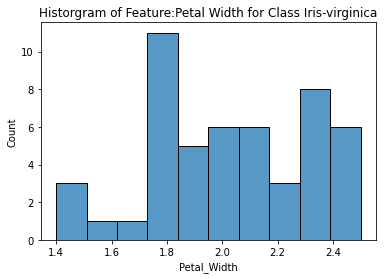

In [7]:
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for j, feat in enumerate(feats):
    for i, iris_class in enumerate(classes):
        plt.figure(i*len(feats)+j)
        sns.histplot(x=iris.loc[iris['Class']==iris_class][feat], bins=10)
        plt.title(f'Historgram of Feature:{feat.replace("_"," ")} for Class {iris_class}')

## 1.3 Conceptual Questions [25 Points]
Answer the following questions about the analysis you just performed. Include the answers
to these questions as text content (using markdown or text cells on Jupyter notebook) in the
same notebook file used for visualization.

### 1. How many features are there? What are the Types of the features (e.g., numeric, nominal, discrete, continuous)?

The data has four features, each of which are continuous, and numerical, the class of the data is a nominal, discrete. The features and their types look like this

| Sepal_Length | Sepal_Width | Petal_Length | Petal_Width |
| --- | --- | --- | --- |
| numeric, discrete | numeric, discrete | numeric, discrete | numeric, discrete |

### 2. From the histograms of the whole data, how do the shapes of the histograms for petal length and petal width differ from those for sepal length and sepal width? Is there a particular value of petal length (which ranges from 1.0 to 6.9) where the distribution of petal lengths (as illustrated by the histogram) could be best segmented into two parts?

In the histograms the sepal length/width and the petal length/width different shapes in the that sepal have seemingly two distinct groups while the petal data has what seems like a more normal distribution. For petal length the two groups could be made from the values of 1 to 2.5 and then 2.5 and up. This would give us 2 different meaningful segments.

### 3. Based upon these boxplots, is there a pair of features that appear to have significantly different medians? Recall that the degree of overlap between variability is an important initial indicator of the likelihood that differences in means or medians are meaningful. Also, based solely upon the box plots, which feature appears to explain the greatest amount of the data? 

It appears like all feautres have different shapes, but the one which seems most significant is sepal length and petal width. The  median for those are on each end of the value scale with speal length appearing much higher than petal width. Based solely on the box plot I would have to say petal length explains the greatest amount of the data, my rationale for this is that the data's inner quartile range covers the biggest range on the value scale.

### 4. From the pairwise plots of the features, which features are most correlated from the plots? Mention at least three pairs.
Three pairs which look to be the most correlated in no particular order are: (sepal length and petal width), (sepal length and petal length) and (petal length and petal width). They all have a seemingly obvious trend line. 

### 5. Compare the histograms of each class to the histograms of the whole dataset. What differences do you see in the shapes?
Overall the data for the petal width an length seems more normal when disaggregated by the class. This isn't true for every class but does seem to be the pattern. On top of this much of the data shape seems to be similar to the shape of the data overall. 

## 2 Air Quality Dataset [40 Points]
Download the Air Quality dataset from (http://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip). Note that this dataset is much larger than the Iris dataset, both with respect to the number of instances and the number of features. A description of this dataset can be found at (http://archive.ics.uci.edu/ml/datasets/Air+Quality). Download the dataset in your machine, and then unzip. Use the AirQualityUCI.xlsx file for the data. You can use ` pandas.read_excel(‘AirQualityUCI.xlsx’) ` to read the file in DataFrame

In [8]:
air_data = pd.read_excel('AirQualityUCI.xlsx')

### 2.1 Summary Statistics [5 Points]
As in Section 1, Compute and display summary statistics for each feature available in the dataset. These must include the minimum value, maximum value, mean, range, standard deviation, variance, count, and 25:50:75% percentiles.

In [9]:
aq_summary = air_data.describe().T
aq_summary['range'] = [(np.ptp(air_data[index])) for index in aq_summary.T]
aq_summary['variance'] = [air_data[index].var() for index in aq_summary.T]
aq_summary

,count,mean,std,min,25%,50%,75%,max,range,variance
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.600000,1.500000,2.600000,11.900000,211.900000,6030.636106
PT08.S1(CO),9357.0,1048.869652,329.817015,-200.0,921.000000,1052.500000,1221.250000,2039.750000,2239.750000,108779.263095
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.000000,-200.000000,-200.000000,1189.000000,1389.000000,19540.990493
C6H6(GT),9357.0,1.865576,41.380154,-200.0,4.004958,7.886653,13.636091,63.741476,263.741476,1712.317143
PT08.S2(NMHC),9357.0,894.475963,342.315902,-200.0,711.000000,894.500000,1104.750000,2214.000000,2414.000000,117180.176653
NOx(GT),9357.0,168.604200,257.424561,-200.0,50.000000,141.000000,284.200000,1479.000000,1679.000000,66267.404793
PT08.S3(NOx),9357.0,794.872333,321.977031,-200.0,637.000000,794.250000,960.250000,2682.750000,2882.750000,103669.208719
NO2(GT),9357.0,58.135898,126.931428,-200.0,53.000000,96.000000,133.000000,339.700000,539.700000,16111.587462
PT08.S4(NO2),9357.0,1391.363266,467.192382,-200.0,1184.750000,1445.500000,1662.000000,2775.000000,2975.000000,218268.721729
PT08.S5(O3),9357.0,974.951534,456.922728,-200.0,699.750000,942.000000,1255.250000,2522.750000,2722.750000,208778.379165


### 2.2 Data Visualization [15 Points]
Also as in Section 1, create histograms and boxplots for the dataset with and without outliers. You may use `showfliers=False` to remove outliers from the boxplots

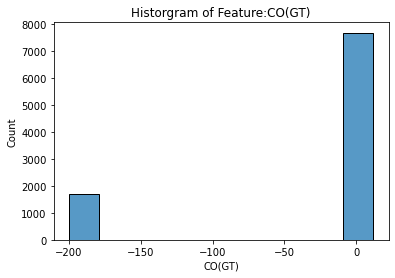

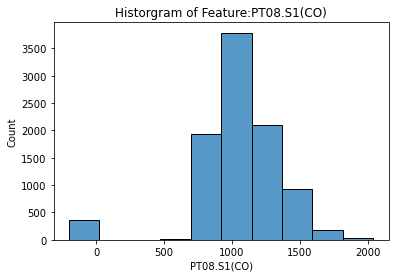

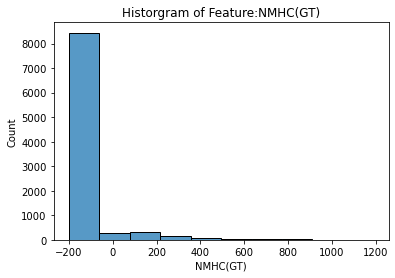

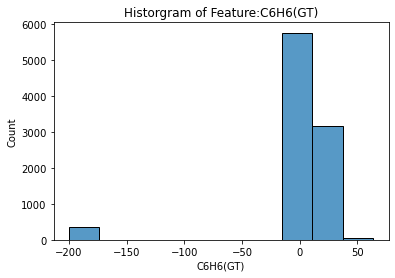

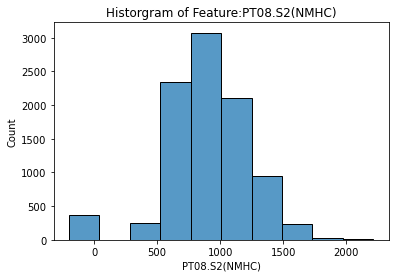

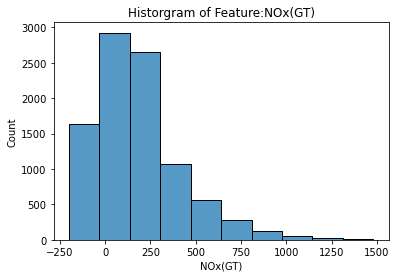

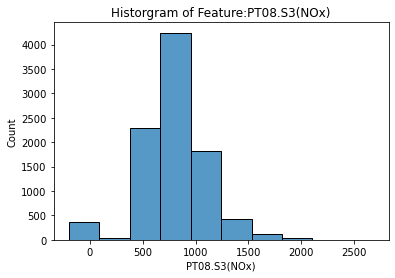

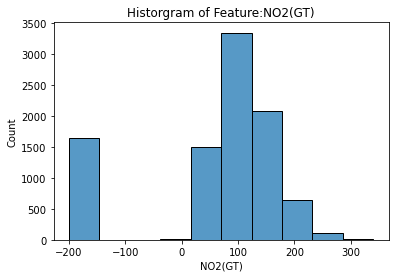

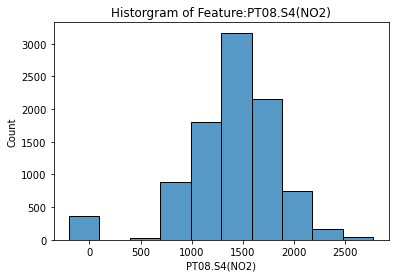

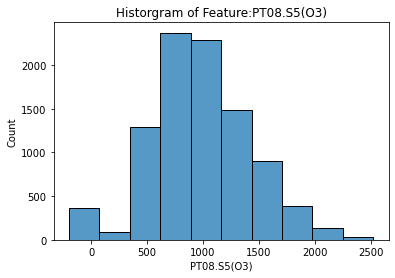

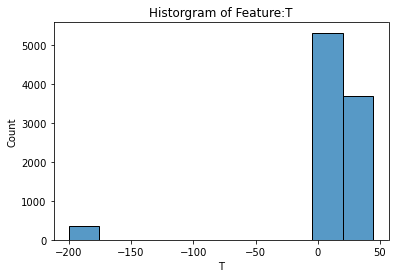

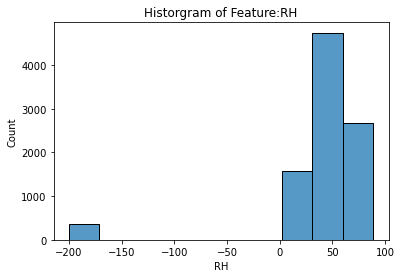

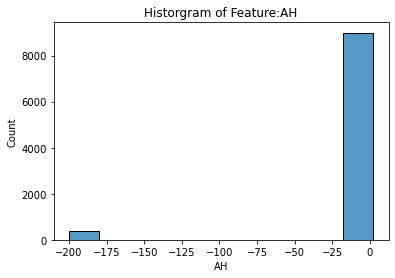

In [10]:
feats = [feat for feat in aq_summary.T]
for i, feat in enumerate(feats):
    plt.figure(i)
    sns.histplot(x=air_data[feat], bins=10) # bins need to be set to 10 to match the settings in the pandas package
    plt.title(f'Historgram of Feature:{feat}')

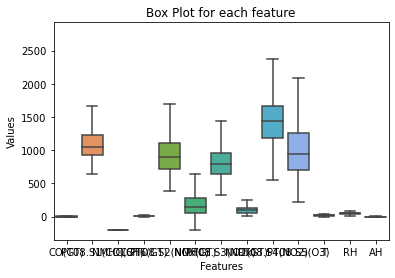

In [11]:
s = sns.boxplot(data=air_data, fliersize=0)
s.set_xlabel('Features')
s.set_ylabel('Values')
s.set_title('Box Plot for each feature')
plt.rcParams['figure.figsize'] = [20, 10]

## 2.3 Conceptual Questions [20 Points]
Answer the following questions about the analysis you just performed. Include the answers to this questions as text content (using markdown or text cells on Jupyter notebook) in the same notebook file used for visualization.

### 1. From the histograms, what abnormality can you see?
Each feature seems to have outliers which can effect the data and the way the visualization works, the most egregious outliers appear in the NHMC(GT) making it so the data's shape is hidden in the lowest bin (When using the default bin count of 10). It also appears that CO(GT) may be a assymetric attribute. 

### 2. What abnormality can you see from the summary statistics?
The missing value, value -200 is causing many issues with the data and this shows in the summary statistics. Overall the data has other suspious markers but its hard to tell if that is caused by the missing value issue or not without first dealing with it.

### 3. How can you remove the abnormality from the data?
We can remove the value from the missing values and replace them with NA this will correct the data problems caused by the missing values having a value from there we should be able to see if there is any other issues with the data.

In [12]:
air_data_fixed = air_data.replace(-200)

### 4. Show how the histograms look after removing the abnormalities from the data?

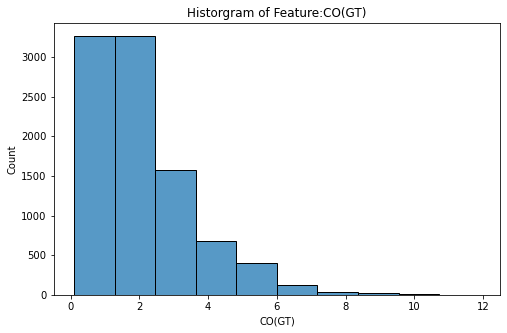

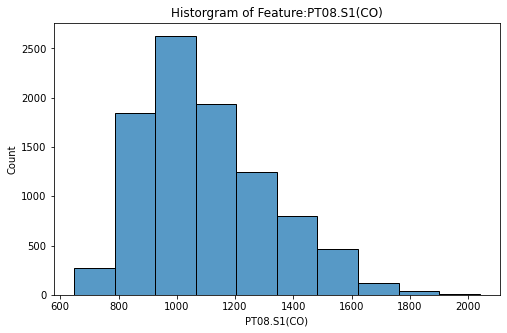

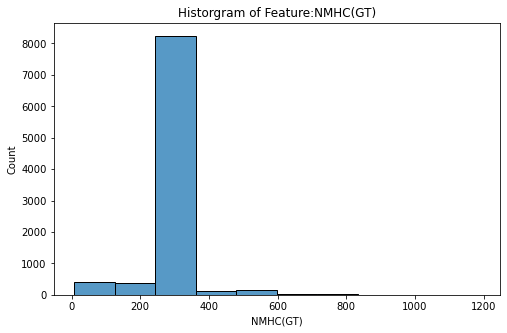

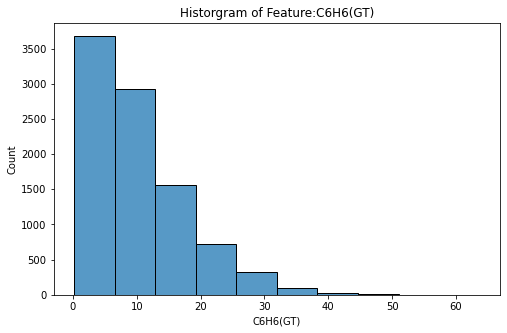

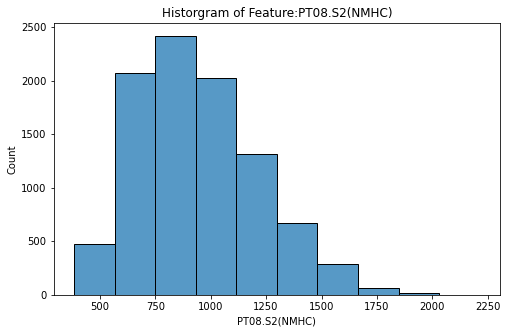

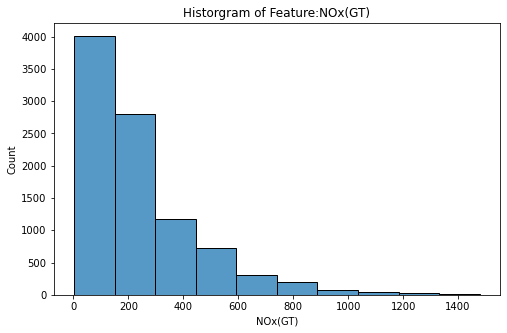

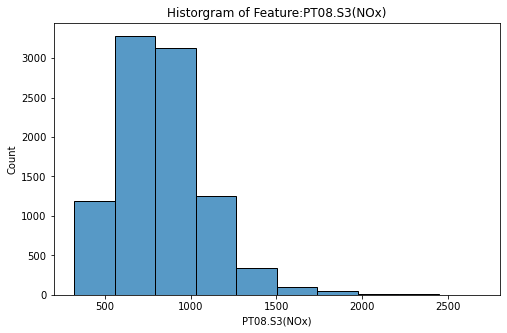

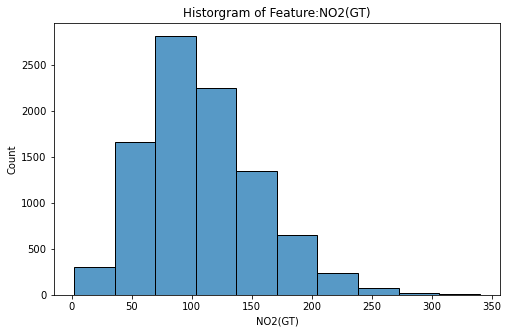

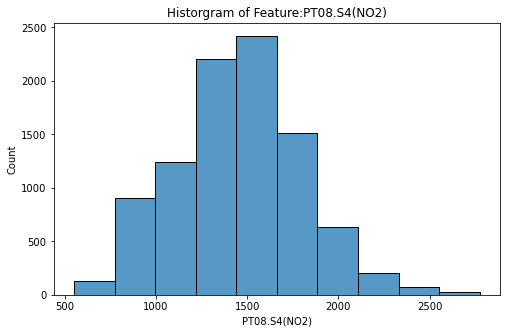

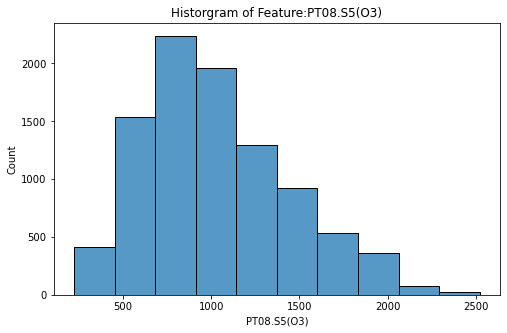

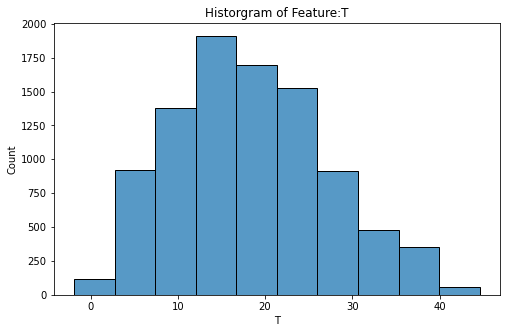

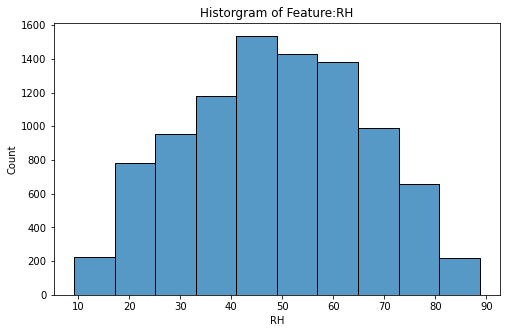

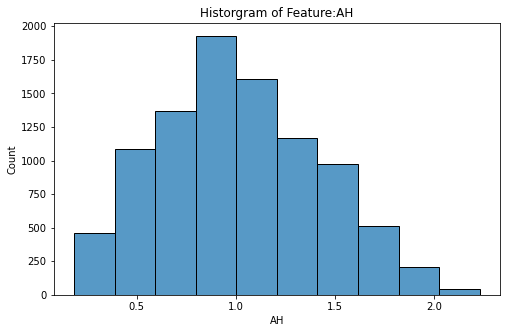

In [13]:
plt.rcParams['figure.figsize'] = [8, 5]
for i, feat in enumerate(feats):
    plt.figure(i)
    sns.histplot(x=air_data_fixed[feat], bins=10) # bins need to be set to 10 to match the settings in the pandas package
    plt.title(f'Historgram of Feature:{feat}')
    